# Data Preparation and Visualization

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is an approach to analyzing data sets to summarize and understand their main characteristics, often with visual methods.

Starting with your *Machine Learning Checklist* you will see that a crucial step is **preparing and understanding** the data. It is a step where you will spend most of your time.  Here is an example checklists from [Aurélien Géron](10_20_2018_Machine-Learning-Project-Checklist.txt) that you can adapt to your needs.   

In these series of notebooks, we explore the Home Credit data set. We clean, preprocess and visualize the data for downstream processes in the Data Science Workflow.  All notebooks can be obtained from Github : https://github.com/chalendony/data-prep-visualization


# Python Imports

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
pd.set_option('display.max_columns', 125)
import quilt
from scripts.preprocess import percent_missing, align_dataframes, as_dict
from string import Template

# Overview Data Set

The [data](https://www.kaggle.com/c/home-credit-default-risk/data) is provided by Home Credit,  a service dedicated to provided lines of credit (i.e.: loans). 

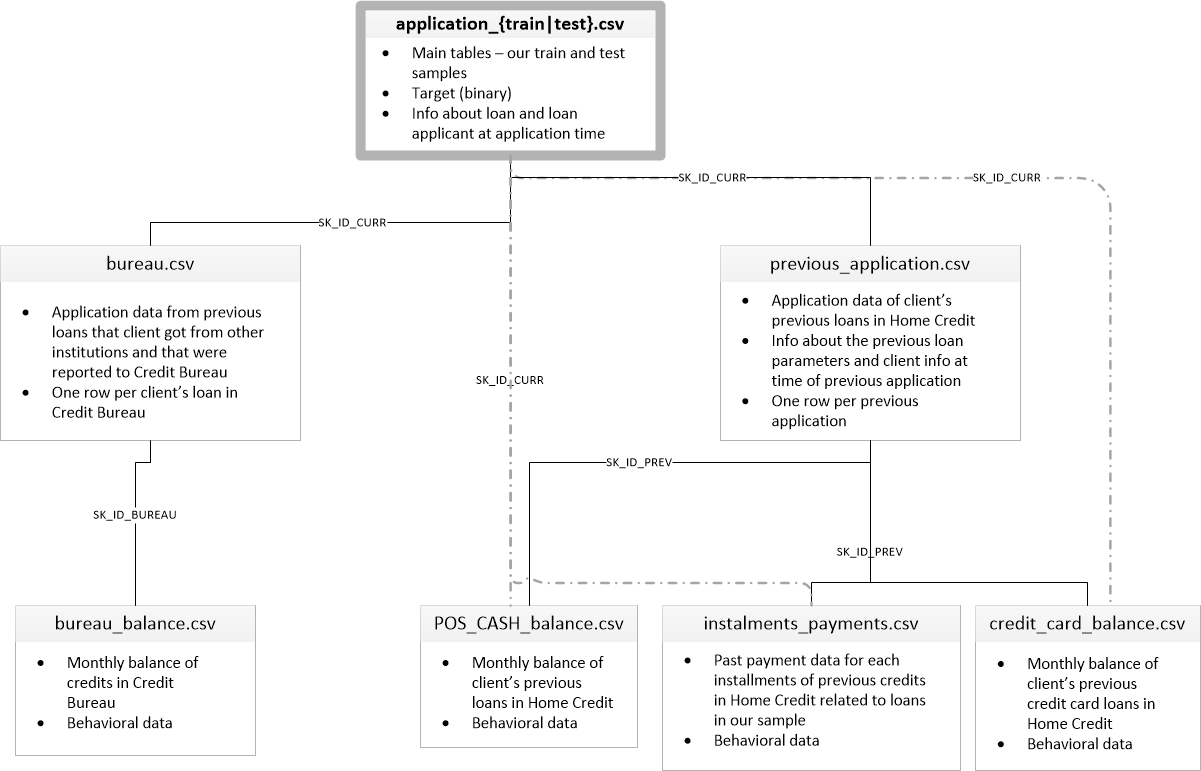

# Loading Data :  Quilt Data Repository

_I perform analysis locally using work related data; I don't need a Data Repository._

* You probably perform most of your analysis locally, but Cloud-based workflows have benefits. 
* Will our day-to-day workflows become cloud-native? ... time will tell, so stay tuned!
* __NOTE:__ Since we are __*not*__ using sensitive data, we can use the cloud
* The environment for this workshop looks like this: 
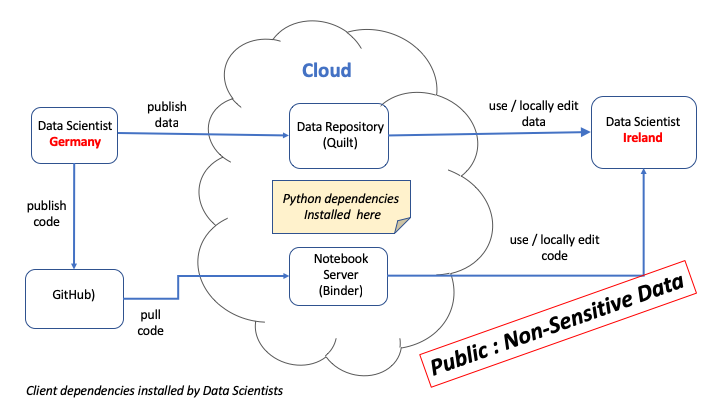

## Optional: Reset Local Quilt Repository

* Wipe local repository and, does not affect the remote repository 

In [1]:
#### quilt.rm("avare/homecredit") # local

## Optional:  Install Quilt Package in Local Repository

* __First time only:__ we initially install the package in the local repository; 
* Installation is only needed again if there is a new version of the data
* Optionally, use the hash if you want to download a specific version of the data

In [7]:
# quilt.install("avare/homecredit", hash="1266d85da94de98efe04a61beb6b028db90ad703155b28b550fbfb79e9b8fb7e")

  0%|          | 0.00/707M [00:00<?, ?B/s]

100%|██████████| 707M/707M [02:58<00:00, 3.96MB/s] 


## Import Quilt Packages from Local Repository 

In [47]:
from quilt.data.avare import homecredit

## Glimpse Quilt Package

What is contained in the Quilt package?

* `homecredit` to see Nodes in the package 
* Alternatively, `quilt.inspect()` : gives more detailed information about the repository contents, may take a while depending on repository size

In [48]:
homecredit

<GroupNode>
POS_CASH_balance
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application

## Glimpse: Applicaton Dataframe 

* note the use of parens () when accessing the dataframes in the homecredit package.
* otherwise, we are just handling a Pandas dataframe

In [49]:
df = homecredit.application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Dataframe Information

Dataframe.info() function prints information that can answer the following questions about a DataFrame:

* How many rows and columns do we have?
* Did csv.read() infer the types correctly?
* How many of each dtypes is used?
* Which rows / columns can be excluded from further analysis?
* How much memory does the data require?

In [50]:
homecredit.application_train().info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

# Part 1: Data Preparation

Clean, analyze and prepare data

## Preprocessing Scripts
 
Whenever possible, it is useful to create reusable scripts to automate preprocessing tasks. A few scripts have been imported to ease wrangling and cleaning our data:
 
 * align_dataframes()  : align table based on primary keys of the target table
 * percent_missing() : percentage of missing data for a dataframe

Did you notice the use of  parens () when accessing the dataframes in the homecredit package ?  

* A bit of code will allow us to conveniently avoid this notation during further steps in the analysis
* Note: any modification made to the homecredit object in our code overwrites the data in the local repository (). A copy of the dataframes are created, so we can safely modify them locally during analysis. Pack all tables in dictionary.

In [51]:
# avoid parens and copy original data
frames = {}
for key, val in homecredit._items():
    frames[key] = val().copy(deep=True)

## Set Data Types

* Pandas.read_csv() infers the data types. Sometimes the types are not as we would like.
* Load the data description file, containing the data types

### Load Data Description File

In [52]:
hc_description = pd.read_excel('data/HomeCredit_columns_description.xlsx', sheet_name='Sheet1',usecols=[2,3,4])
hc_description.head()

,Table,Row,Type
0,application_train,SK_ID_CURR,numerical
1,application_train,TARGET,categorical
2,application_train,NAME_CONTRACT_TYPE,categorical
3,application_train,CODE_GENDER,categorical
4,application_train,FLAG_OWN_CAR,categorical


### Fix Error is Data Description

* Some error in the data: A column in the description file is not present in the data file

In [53]:
idx = hc_description[(hc_description.Row == 'NFLAG_MICRO_CASH') & (hc_description.Table == 'previous_application')].index
hc_description.drop(idx, inplace=True)

### Update Data Types 

* Pandas read columns as objects, we convert them to category and fix any mis-typed columns manually.

In [59]:
for table in frames.keys():
    print(table)  
    
    # retriev type from description
    df = hc_description.loc[hc_description['Table']==table,['Row','Type']]
    dict_types = as_dict(df)
    
    # set types in data table
    frames[table] = frames[table].astype(dict_types)


POS_CASH_balance
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application


In [60]:
frames['application_train'].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      float64
TARGET                          category
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                    category
FLAG_OWN_REALTY                 category
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OWN_CAR_AGE                     float6

## Drop Rows Missing Target

Drop rows that have no target variable, when a the foreign key of a child table does not map to a key of a target instance. 

In [7]:
frames = align_dataframes(frames)

## Drop Selected Columns

* Experiment with the threshold and decide which columns to drop from tables
* Empty results signifies column passes threshold condition
* a column may need to be dropped if it has no meaning for the target 

In [8]:
threshold = 60
s = Template(""" Perc_Missing >= ${threshold} """)
    
for key in frames.keys():
    print('\nTable: {}'.format(key))
    df = frames[key]
    targetcols = [*df.columns.values]
    print(percent_missing(df, targetcols).query(s.substitute(threshold=threshold)))


Table: POS_CASH_balance
Empty DataFrame
Columns: [Total, Perc_Missing]
Index: []

Table: bureau
                          Total  Perc_Missing
AMT_ANNUITY             1130013     77.116885
AMT_CREDIT_MAX_OVERDUE   948545     64.732738

Table: credit_card_balance
Empty DataFrame
Columns: [Total, Perc_Missing]
Index: []

Table: installments_payments
Empty DataFrame
Columns: [Total, Perc_Missing]
Index: []

Table: previous_application
                            Total  Perc_Missing
RATE_INTEREST_PRIVILEGED  1408910     99.661102
RATE_INTEREST_PRIMARY     1408910     99.661102

Table: application_train
                           Total  Perc_Missing
COMMONAREA_MEDI           214865     69.872297
COMMONAREA_AVG            214865     69.872297
COMMONAREA_MODE           214865     69.872297
NONLIVINGAPARTMENTS_MODE  213514     69.432963
NONLIVINGAPARTMENTS_AVG   213514     69.432963
NONLIVINGAPARTMENTS_MEDI  213514     69.432963
FONDKAPREMONT_MODE        210295     68.386172
LIVINGAPARTMENTS_M

* `RATE_INTEREST_PRIVILEGED` and `RATE_INTEREST_PRIMARY` in the `previous_application` table have more than 80 percent missing in columns, so drop these columns from the analysis.

In [9]:
## Drop the selected columns

table = 'previous_application'
dropcols = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY']
frames[table].drop(dropcols, axis=1, inplace=True)

# verify / assert sucessfully dropped
target = frames[table].columns
res = any([c in target for c in dropcols])
print('Drop successful: {} '.format(not res))

Drop successful: True 


# Missing Data Strategy

_What are my options for handling missing data?_

+ Option 1: Delete instances (rows) that have missing data:  eg: DF.dropna(subset=["column_name"]

+ Option 2: Drop columns with a high percentage of missing values: DF.drop("total_bedrooms", axis=1)

+ Option 3: Impute: fill in these missing values

+ Option 4: Algorithms such as, XGBoost that can handle missing values with no need for imputation. 



* Which option we choose depends on a number of factors: such as, importance of the column or amount of missing data. 
* Lets decide on a strategy by first, examining the missing columns per datatype: categorical and numeric.

##  Missing Categoricals

Let's assume that a missing categorical value have a special meaning. So, we impute the missing categorical values with a dedicated symbol.

In [26]:
for key in frames.keys():
    print('\n Table: {}'.format(key))
    df = frames[key]
    targetcols = [*df.columns.values]
    hc_description
    print(percent_missing(df, targetcols).query(s.substitute(threshold=threshold)))
    
    
missing_cat = percent_missing(df, categorical_features)
missing_cat.tail()

,Total,Perc_Missing
WEEKDAY_APPR_PROCESS_START,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
SK_ID_CURR,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
FLAG_DOCUMENT_21,0,0.0


### Percent Missing Categorical Values

_How much categorical data is actually missing?_

* The question comes up frequently, so lets use a script from our own toolbox:  percent_missing(df, categorical_features)
    
* The percent_missing() script takes the original dataframe and a list target columns as input, and returns a dataframe consisting of totals and percent missing for the target columns.

In [ ]:
## Exercise 1: Practice Cell 

Load indata

In [ ]:
print('I have {} numeric variables)'.format(len(numerical_features)))

In [36]:
print("I have {} numeric features".format(len(numerical_features)))

I have 69 numeric features
